# Projet 6 - Analysez les ventes d'une librairie

## Plan

* [1 - Importation des librairies](#chapter1)
   
* [2 - Lecture des données](#chapter2)
    
    * [2.1 - Données clients](#section_2_1)
    * [2.2 - Données produits](#section_2_2)
    * [2.3 - Données transactions](#section_2_3)

* [3 - Nettoyage du jeu de données (Qualité des données)](#chapter3)
    
    * [3.1 - Données clients](#section_3_1)
    * [3.2 - Données produits](#section_3_2)
    * [3.3 - Données transactions](#section_3_3)
* [4 - Analyses des données](#chapter4)
    * [4.1 - Création des informations necessaires à l'analyse des données](#section_4_1)
    * [4.2 - Regroupement des données des trois fichiers de données](#section_4_2)
    * [4.3 - Calcul et analyse du chiffre d affaire par produit](#section_4_3)
    * [4.4 - Calcul du chiffre total réalisé](#section_4_4)
    * [4.5 - Détection et analyse des outliers](#section_4_5)
    * [4.6 - Analyse de l'Evolution du chiffre d'affaire mensuel](#section_4_6)
    * [4.7 - Analyse de l'évolution du chiffre d'affaire annuel  ](#section_4_7)
    * [4.8 - Liste des 10 produits les plus vendus (Chiffre d'affaire le plus elevé)  ](#section_4_8)
    * [4.9 - Liste des produits les moins vendus (un produit flop est un invendu ou un produit avec un CA inférieur à 300)](#section_4_9)
    * [4.10 - Analyse du profil des clients](#section_4_10)
    * [4.11 - Analyse de la répartition du chiffre d'affaire entre les clients](#section_4_11)
    * [4.12 - Analyse de la corrélation entre le prix de vente et le nombre de ventes](#section_4_12)
    * [4.13 - Analyse de la corrélation entre le genre d’un client et les catégories des livres achetés ](#section_4_13)
    * [4.14 - Analyse de la corrélation entre l’âge des clients et le montant total des achats](#section_4_14)
    * [4.15 - Analyse de la corrélation entre l’âge des clients et la fréquence d’achat](#section_4_15)
    * [4.16 - Analyse de la corrélation entre l’âge des clients et la taille du panier moyen](#section_4_16)
    * [4.17 - Analyse de la corrélation entre l’âge (tranche d'âge) des clients et les catégories des livres achetés](#section_4_17)
    * [4.18 - Probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159](#section_4_18)
    
* [5 - Préconisations](#chapter5)

## 1 - Importation des librairies <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st
import seaborn as sns

## 2 - Lecture des données <a class="anchor" id="chapter2"></a>

### 2.1 - Données clients <a class="anchor" id="section_2_1"></a>

##### Importer les données du fichier customers.csv dans le dataframe dataCustomers

In [2]:
dataCustomers=pd.read_csv('C:/Users/33768/Documents/DataSets/Projet 6/customers.csv', sep=',',encoding='UTF-8')  

##### Afficher les 5 premières lignes pour s assurer que les données ont été chargées correctement

In [3]:
dataCustomers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


##### Afficher la dimension du dataframe

In [4]:
dataCustomers.shape

(8623, 3)

### 2.2 - Données produits (products) <a class="anchor" id="section_2_2"></a>

##### Importer les données du fichier products.csv dans le dataframe dataProducts

In [5]:
dataProducts=pd.read_csv('C:/Users/33768/Documents/DataSets/Projet 6/products.csv', sep=',',encoding='UTF-8')

##### Afficher les 5 premières lignes pour s assurer que les données ont été chargées correctement

In [6]:
dataProducts.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


##### Afficher les différentes catégories de produits

In [7]:
dataProducts['categ'].unique()

array([0, 1, 2], dtype=int64)

Il existe 3 catégories de produits 0, 1 et 2.

##### Afficher la dimension du dataframe

In [8]:
dataProducts.shape

(3287, 3)

### 2.3 - Données transactions <a class="anchor" id="section_2_3"></a>

##### Importer les données du fichier transactions.csv dans le dataframe dataTransactions

In [9]:
dataTransactions=pd.read_csv('C:/Users/33768/Documents/DataSets/Projet 6/transactions.csv', sep=',',encoding='UTF-8')

##### Afficher les 5 premières lignes pour s assurer que les données ont été chargées correctement

In [10]:
dataTransactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


##### Afficher la dimension du dataframe

In [11]:
dataTransactions.shape

(679532, 4)

## 3 - Nettoyage du jeu de données (Qualité des données) <a class="anchor" id="chapter3"></a>

### 3.1 - Données clients <a class="anchor" id="section_3_1"></a>

##### Vérifier le typage de données

 Vérifier que les variables ont bien été importées dans le bon type.

In [12]:
dataCustomers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

Tout semble en ordre.

##### Vérifier les valeurs manquantes (NaN)

In [13]:
dataCustomers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

Il n'y a pas de valeurs manquantes.

##### Vérifier la présence des doublons et l'unicité de la clé primaire

In [14]:
dataCustomers.duplicated(subset=['client_id']).sum()

0

Il n'y a pas de doublon.

##### Vérifier que les sexes présents dans la colonne sex sont corrects (m et f)

In [15]:
# Liste des sexes valides
Valid_Sexe=['m','f']

# Vérifier la validité des sexes
dataCustomers.sex.isin(Valid_Sexe).all()

True

Tous les sexes sont corrects.

##### Vérifier le format de la date de naissance (4 chiffres)

In [16]:
len(dataCustomers[(dataCustomers.birth <4) & (dataCustomers.birth >4)])

0

Toutes les dates respectent le bon format.

##### Détection des outliers

In [17]:
dataCustomers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


Tout semble normal. Il n'ya pas d'outliers.

### 3.2 - Données produits (products) <a class="anchor" id="section_3_2"></a>

##### Vérifier le typage de données

 Vérifier que les variables ont bien été importées dans le bon type.

In [18]:
dataProducts.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

Tous les types semblent corrects.

##### Vérifier les valeurs manquantes (NaN)

In [19]:
dataProducts.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

Il n'y a pas de valeurs manquantes.

##### Vérifier l'existence des doublons et l'unicité de la clé primaire

In [20]:
dataProducts.duplicated(subset=['id_prod']).sum()

0

Il n'y a pas de doublons.

##### Vérifier et lister les produits sans fiche produit (présents dans les transactions mais absents dans la base des produits)

In [21]:
# Selectionner les identifiants des produits dans  
listeProduits=dataProducts['id_prod']

# Vérifier si tous les produits présents dans les transactions ont des fiches produits dans le fichier de produits 
transactionsAvecProduitsManquants=dataTransactions.query("id_prod not in @listeProduits")

# Afficher les produits manquants
transactionsAvecProduitsManquants['id_prod'].unique()

array(['0_2245'], dtype=object)

Le produit 0_2245 est le seul sans fiche produit. Une fiche produit va être créée dans base de données des produits avec comme prix le prix moyen des produits de la catégorie 0.

##### Rechercher la moyenne du prix d'un produit de la catégorie 0

In [22]:
moyenneProdCatZero=dataProducts.query('categ==0')
moyenneProdCatZero.describe()

,price,categ
count,2309.000000,2309.0
mean,11.727280,0.0
std,7.568756,0.0
min,-1.000000,0.0
25%,5.580000,0.0
50%,10.320000,0.0
75%,16.650000,0.0
max,40.990000,0.0


Il existe un prix négatif. Ce qui n'est pas normal. Ce prix devra être remplacé.

##### Créer la fiche du produit manquant 0_2245 dans la table de produits avec le prix moyen d'un produit  de la catégorie 0 (11,73)

In [23]:
dataProducts=dataProducts.append({'id_prod' : '0_2245' , 'price' : 11.73, 'categ' : 0} , ignore_index=True)

##### Vérifier que le nouveau produit a été ajouté dans la table de produits

In [24]:
dataProducts.query('id_prod == "0_2245"')

,id_prod,price,categ
3287,0_2245,11.73,0


Le nouveau produit est bel et bien présent dans la base de données des produits.

##### Afficher la nouvelle dimension de la table des produits

In [25]:
dataProducts.shape

(3288, 3)

##### Vérifier que tous les produits respectent la nommenclature des noms des produits (catégorie_) 

In [26]:
# Sélection des identifiants des produits
data = dataProducts['id_prod'].astype(str)

# Sélection des produits valides (respectant la nommenclature des noms des produits categorie_)
produitsValides=data.loc[data.str.startswith(('0','1','2'))] 

# Nombre de produits ne respectant pas la nommenclature des noms des produits
print('Sur les 3288 produits, '+ str(data.loc[data.str.startswith(('0','1','2'))].count()) + ' sont valides.')

Sur les 3288 produits, 3287 sont valides.


Le produit ne respectant pas la nommenclature sera recherché et analysé.

##### Rechercher le produit ne respectant pas la nommenclature des noms des produits categorie_codeproduit

In [27]:
dataProducts.query("id_prod not in @produitsValides")

,id_prod,price,categ
731,T_0,-1.0,0


Le produit ne respectant pas la nommenclature est un produit test. Il a un prix négatif. Le prix négatif sera remplacé par 0.

##### Remplacer le prix négatif du produit de test par 0 

In [28]:
dataProducts.loc[dataProducts.price<0,'price']=0

dataProducts.query('id_prod=="T_0"')

,id_prod,price,categ
731,T_0,0.0,0


Ce produit ne sera pas integré dans l'analyse des données.

##### Détection des outliers

In [29]:
dataProducts.describe()

,price,categ
count,3288.000000,3288.000000
mean,21.853866,0.370134
std,29.843662,0.615327
min,0.000000,0.000000
25%,6.990000,0.000000
50%,13.055000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Tout semble normal. Il n'ya pas d'outliers. Le prix négatif a disparu, il correspondait au prix du produit de test. Il a été remplacé par 0.

### 3.3 - Données transactions <a class="anchor" id="section_3_3"></a>

##### Vérifier le typage de données

 Vérifier que les variables ont bien été importées dans le bon type.

In [30]:
dataTransactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

La seule chose qui semble être problématique est la variable date qui n'est pas considérée comme une date. Cette variable sera convertie en type date.

##### Convertir la colonne date en datime

In [31]:
dataTransactions['date']=pd.to_datetime(dataTransactions['date'],errors = 'coerce',format = '%Y-%m-%d')

##### Vérifier la modification du type de données de la variable date

In [32]:
dataTransactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

##### Vérifier les valeurs manquantes (NaN)

In [33]:
dataTransactions.isna().sum()

id_prod         0
date          200
session_id      0
client_id       0
dtype: int64

La variable date a 200 valeurs manquantes.

##### Afficher les données avec les valeurs manquantes

In [34]:
dataTransactions.loc[dataTransactions['date'].isnull(),:]

,id_prod,date,session_id,client_id
3019,T_0,NaT,s_0,ct_0
5138,T_0,NaT,s_0,ct_0
9668,T_0,NaT,s_0,ct_1
10728,T_0,NaT,s_0,ct_0
15292,T_0,NaT,s_0,ct_0
...,...,...,...,...
657830,T_0,NaT,s_0,ct_0
662081,T_0,NaT,s_0,ct_1
670680,T_0,NaT,s_0,ct_1
671647,T_0,NaT,s_0,ct_1


Les données avec les dates manquantes correspondent aux données de test.

##### Supprimer les 200 transactions avec le produit test

In [35]:
indexNames = dataTransactions[ (dataTransactions['id_prod'] == "T_0")].index
dataTransactions.drop(indexNames , inplace=True)

##### Vérifier que les 200 transactions avec le produit test ont été supprimées

In [36]:
dataTransactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


Sur les 679 532 transactions, 200 ont été supprimés. Il en reste 679 332.

##### Vérifier que tous les clients présents dans les transactions ont une fiche client 

In [37]:
# Selectionner les identifiants des clients dans la base de clients  
listeClients=dataCustomers['client_id']

# Vérifier si tous les clients présents dans les transactions sont présents dans la base de clients 
transactionsAvecClientsManquants=dataTransactions.query("client_id not in @listeClients")

# Afficher les produits manquants
transactionsAvecClientsManquants

,id_prod,date,session_id,client_id


Tous les clients présents dans les transactions ont une fiche clients.

##### Détection des outliers

In [38]:
dataTransactions.describe(include='all',datetime_is_numeric=True)

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,NaN,342315,8600
top,1_369,NaN,s_118668,c_1609
freq,2252,NaN,14,25488
mean,NaN,2022-03-03 15:13:19.307389696,NaN,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN
25%,NaN,2021-09-08 09:14:25.055994368,NaN,NaN
50%,NaN,2022-03-03 07:50:20.817730560,NaN,NaN
75%,NaN,2022-08-30 23:57:08.555173888,NaN,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN


A première vue, rien de cloche pour la date. Il n'y a pas suffisamment d'informations pour les autres colonnes.

## 4 - Analyses des données <a class="anchor" id="chapter4"></a>

### 4.1 - Création des informations necessaires à l'analyse des données<a class="anchor" id="section_4_1"></a>

##### Calculer l'âge des clients

In [39]:
# Recuperer l'année en cours
date = datetime.date.today()
year = date.strftime("%Y")

# Afficher l'année en cours
print('L\'année en cours est ' + year )

# Calcul de l'age des clients
dataCustomers['Age']=int(year)-dataCustomers['birth']
dataCustomers

L'année en cours est 2021


,client_id,sex,birth,Age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


##### Créer la colonne Année_Mois extrait de la date

In [40]:
dataTransactions['Année_Mois'] = dataTransactions['date'].dt.strftime('%Y-%m')

##### Afficher le dataframe pour s'assurer que la colonne Mois a été créee

In [41]:
dataTransactions

,id_prod,date,session_id,client_id,Année_Mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01
...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07


##### Créer une colonne Année extrait de la date

In [42]:
dataTransactions['Année'] = dataTransactions['date'].dt.strftime('%Y')

##### Afficher le dataframe pour s'assurer que la colonne Année a été créee

In [43]:
dataTransactions

,id_prod,date,session_id,client_id,Année_Mois,Année
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01,2023
...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01,2022
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03,2022
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12,2022
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07,2021


##### Afficher le type de données pour s'assurer qu'il est toujours correct

In [44]:
dataTransactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
Année_Mois            object
Année                 object
dtype: object

##### Modifier le format de la colonne date (avant : %Y-%m-%d %H:%M:%S)

In [45]:
dataTransactions['date'] = dataTransactions['date'].dt.strftime('%Y-%m-%d')

##### Afficher le dataframe pour s'assurer que le format de la colonne date a été modifié

In [46]:
dataTransactions

,id_prod,date,session_id,client_id,Année_Mois,Année
0,0_1518,2022-05-20,s_211425,c_103,2022-05,2022
1,1_251,2022-02-02,s_158752,c_8534,2022-02,2022
2,0_1277,2022-06-18,s_225667,c_6714,2022-06,2022
3,2_209,2021-06-24,s_52962,c_6941,2021-06,2021
4,0_1509,2023-01-11,s_325227,c_4232,2023-01,2023
...,...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,2022-01,2022
679528,1_639,2022-03-19,s_181434,c_4370,2022-03,2022
679529,0_1425,2022-12-20,s_314704,c_304,2022-12,2022
679530,0_1994,2021-07-16,s_63204,c_2227,2021-07,2021


##### Vérifier le typage de données

In [47]:
dataTransactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
Année_Mois    object
Année         object
dtype: object

##### Convertir la colonne date en datime

In [48]:
dataTransactions['date']=pd.to_datetime(dataTransactions['date'],errors = 'coerce',format = '%Y-%m-%d')

##### Vérifier le typage de données

In [49]:
dataTransactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
Année_Mois            object
Année                 object
dtype: object

## 4.2 - Regroupement des données des trois fichiers de données<a class="anchor" id="section_4_2"></a>

##### Transactions et produits

In [50]:
dataTransactionProduits = pd.merge(dataTransactions,dataProducts,on=['id_prod','id_prod'])
dataTransactionProduits

,id_prod,date,session_id,client_id,Année_Mois,Année,price,categ
0,0_1518,2022-05-20,s_211425,c_103,2022-05,2022,4.18,0
1,0_1518,2021-09-26,s_95811,c_6197,2021-09,2021,4.18,0
2,0_1518,2021-05-06,s_30782,c_682,2021-05,2021,4.18,0
3,0_1518,2022-03-16,s_180057,c_5932,2022-03,2022,4.18,0
4,0_1518,2022-11-12,s_296584,c_7217,2022-11,2022,4.18,0
...,...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23,s_52563,c_1025,2021-06,2021,20.99,0
679328,0_1683,2021-12-24,s_139091,c_5508,2021-12,2021,2.99,0
679329,0_1379,2021-10-16,s_105547,c_5425,2021-10,2021,2.99,0
679330,0_886,2021-03-17,s_7410,c_7219,2021-03,2021,21.82,0


##### Transactions, produits et clients

In [51]:
dataClientsTransactionProduits = pd.merge(dataCustomers,dataTransactionProduits,on=['client_id','client_id'])
dataClientsTransactionProduits

,client_id,sex,birth,Age,id_prod,date,session_id,Année_Mois,Année,price,categ
0,c_4410,f,1967,54,0_1277,2022-03-25,s_184041,2022-03,2022,7.99,0
1,c_4410,f,1967,54,0_1277,2021-09-25,s_94984,2021-09,2021,7.99,0
2,c_4410,f,1967,54,0_1376,2021-09-24,s_94984,2021-09,2021,16.24,0
3,c_4410,f,1967,54,0_1376,2022-04-24,s_198987,2022-04,2022,16.24,0
4,c_4410,f,1967,54,0_1376,2023-01-24,s_331878,2023-01,2023,16.24,0
...,...,...,...,...,...,...,...,...,...,...,...
679327,c_84,f,1982,39,0_1452,2021-09-20,s_92701,2021-09,2021,13.77,0
679328,c_84,f,1982,39,0_1110,2021-09-20,s_92701,2021-09,2021,4.71,0
679329,c_84,f,1982,39,0_1399,2021-10-01,s_98493,2021-10,2021,17.99,0
679330,c_84,f,1982,39,1_110,2021-09-13,s_89478,2021-09,2021,54.90,1


### 4.3 - Calcul et analyse du chiffre d'affaire par produit<a class="anchor" id="section_4_3"></a>

##### Calculer la quantité de vente par produit

In [52]:
VenteParProduit=dataTransactionProduits.groupby(['id_prod','price','categ']).agg({'id_prod':'count'})
VenteParProduit

,,,id_prod
id_prod,price,categ,
0_0,3.75,0,1242
0_1,10.99,0,487
0_10,17.95,0,22
0_100,20.60,0,3
0_1000,6.84,0,432
...,...,...,...
2_95,98.99,2,4
2_96,47.91,2,598
2_97,160.99,2,13


##### Renommer la colonne id_prod en quantité vendue

In [53]:
VenteParProduit.rename(columns={'id_prod':'QuantiteVendue'}, inplace=True)

##### Supprimer les index id_prod, price et categ 

In [54]:
VenteParProduit=VenteParProduit.reset_index()

##### Calculer le chiffre d'affaire par produit 

In [55]:
#Copie du dataframe VenteParProduit
CAParProduit=VenteParProduit.copy()

# Calcul du CA
CAParProduit['CA']=CAParProduit['price']*CAParProduit['QuantiteVendue']
CAParProduit

,id_prod,price,categ,QuantiteVendue,CA
0,0_0,3.75,0,1242,4657.50
1,0_1,10.99,0,487,5352.13
2,0_10,17.95,0,22,394.90
3,0_100,20.60,0,3,61.80
4,0_1000,6.84,0,432,2954.88
...,...,...,...,...,...
3261,2_95,98.99,2,4,395.96
3262,2_96,47.91,2,598,28650.18
3263,2_97,160.99,2,13,2092.87
3264,2_98,149.74,2,1,149.74


##### Vérifier si tous les produits génèrent du chiffre d'affaire

In [56]:
produitCANul=CAParProduit.query('CA == 0')
produitCANul

,id_prod,price,categ,QuantiteVendue,CA


Tous les produits génèrent du chiffre d'affaire.

### 4.4 - Calcul du chiffre d\'affaire total réalisé <a class="anchor" id="section_4_4"></a>

In [57]:
CATotal=round(CAParProduit['CA'].sum(),2)
CATotal

11856321.01

Le chiffre d'affaire total est de 118 563 21,01.

### 4.5 - Détection et analyse des outliers <a class="anchor" id="section_4_5"></a>

#### 4.5.1 - Détection des outliers avec la variable price afin de détecter d’éventuels outliers

##### Calculer le premier quartile

In [58]:
Q1=CAParProduit['price'].quantile(0.25)
Q1

6.99

##### Calculer le troisième quartile

In [59]:
Q3=CAParProduit['price'].quantile(0.75)
Q3

22.99

##### Calculer l'écart inter quartile

In [60]:
IQ=Q3-Q1
IQ

15.999999999999998

In [61]:
minStat=Q1-(IQ*1.5) 
minStat

-17.009999999999998

##### Calculer la valeur au delà duquel le prix est consideré comme un outlier

In [62]:
maxStat=Q3+(IQ*1.5) 
maxStat

46.989999999999995

##### Afficher la valeur au delà duquel le prix de vente est consideré comme un outlier

In [63]:
print('La valeur au delà de laquelle le prix de vente est un outlier : ' + str(round(maxStat,2)))

La valeur au delà de laquelle le prix de vente est un outlier : 46.99


##### Stocker les outliers dans une table

In [64]:
outliersTable = CAParProduit[(CAParProduit.price > maxStat) | (CAParProduit.price < minStat)]

##### Lister les outliers

In [65]:
outliersTable

,id_prod,price,categ,QuantiteVendue,CA
2294,1_10,78.83,1,83,6542.89
2306,1_110,54.90,1,63,3458.70
2309,1_113,50.99,1,8,407.92
2317,1_120,64.59,1,15,968.85
2318,1_121,49.99,1,13,649.87
...,...,...,...,...,...
3261,2_95,98.99,2,4,395.96
3262,2_96,47.91,2,598,28650.18
3263,2_97,160.99,2,13,2092.87
3264,2_98,149.74,2,1,149.74


##### Compter le nombre d'outliers

In [66]:
nbreOutliers=outliersTable['id_prod'].count()
nbreOutliers

299

Il existe 299 outliers.

#### 4.5.2 - Representation graphique des outliers

##### Créer le graphique boite à moustache vertical

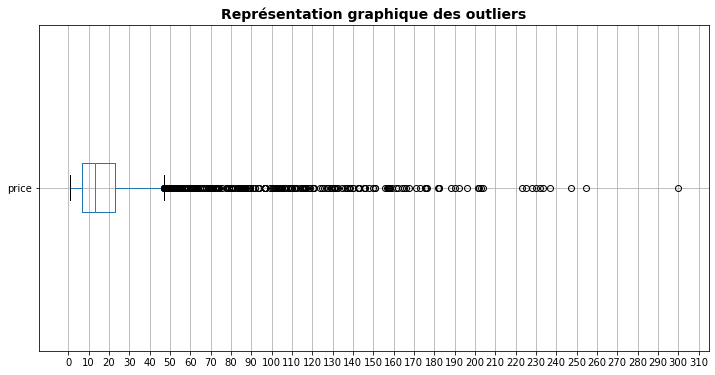

In [67]:
plt.figure(figsize=(12,6))
CAParProduit.boxplot(column="price", vert=False)
plt.xticks([10*i for i in range(32)])

#Ajouter le titre à la boite à moustache
plt.title('Représentation graphique des outliers', fontsize=14, fontweight='bold')

#Afficher le graphique 
plt.show()

#### 4.5.3- Analyse des outliers

##### Calculer le chiffre d\'affaire generé par les outliers 

In [68]:
CAOutliers= round(outliersTable['CA'].sum(),2)
CAOutliers

2795676.58

Le chiffre d'affaire generé par les outliers est de 2 795 676,58.

##### Pourcentage du chiffre d'affaire des outliers sur le CA global

In [69]:
round((CAOutliers/CATotal)*100,2)

23.58

Le chiffre d'affaire des outliers représente 23,58 % du chiffre d'affaire global, ce n'est pas négligeable. Certains outliers génèrent plus de chiffre d'affaire que certains produits non outliers. Par exemple l'outlier 2_159 génère le chiffre d'affaire le plus elevé 94 893,50. Le non outlier 0_1539 génère le plus faible chiffre d'affaire. Compte tenu de ces fait, nous conservons les outliers pour nos analyses.

### 4.6 - Analyse de l'évolution du chiffre d'affaire mensuel <a class="anchor" id="section_4_6"></a>

#### 4.6.1- Calcul du chiffre d'affaire mensuel et la moyenne mobile

##### Calculer le nombre de vente par mois et par produit

In [70]:
VenteParProduitMois=dataTransactionProduits.groupby(['Année_Mois','id_prod','price']).agg({'id_prod':'count'})
VenteParProduitMois

id_prod
Année_Mois id_prod price          
2021-03    0_0     3.75         40
           0_1     10.99        17
           0_10    17.95         2
           0_1000  6.84         19
           0_1001  4.99         21
...                            ...
2023-02    2_90    182.30        1
           2_91    96.99         1
           2_92    78.05         2
           2_95    98.99         1
           2_96    47.91        27

[58900 rows x 1 columns]

In [71]:
VenteParProduitMois.rename(columns={'id_prod':'QuantiteVendue'}, inplace=True)
VenteParProduitMois

QuantiteVendue
Année_Mois id_prod price                 
2021-03    0_0     3.75                40
           0_1     10.99               17
           0_10    17.95                2
           0_1000  6.84                19
           0_1001  4.99                21
...                                   ...
2023-02    2_90    182.30               1
           2_91    96.99                1
           2_92    78.05                2
           2_95    98.99                1
           2_96    47.91               27

[58900 rows x 1 columns]

##### Supprimer les index Année_Mos,id_prod et price

In [72]:
VenteParProduitMois=VenteParProduitMois.reset_index()
VenteParProduitMois

,Année_Mois,id_prod,price,QuantiteVendue
0,2021-03,0_0,3.75,40
1,2021-03,0_1,10.99,17
2,2021-03,0_10,17.95,2
3,2021-03,0_1000,6.84,19
4,2021-03,0_1001,4.99,21
...,...,...,...,...
58895,2023-02,2_90,182.30,1
58896,2023-02,2_91,96.99,1
58897,2023-02,2_92,78.05,2
58898,2023-02,2_95,98.99,1


##### Calculer le chiffre d'affaire mensuel par produit

In [73]:
CAMensuelParProduit=VenteParProduitMois
CAMensuelParProduit['CA']=CAMensuelParProduit['price']*CAMensuelParProduit['QuantiteVendue']
CAMensuelParProduit

,Année_Mois,id_prod,price,QuantiteVendue,CA
0,2021-03,0_0,3.75,40,150.00
1,2021-03,0_1,10.99,17,186.83
2,2021-03,0_10,17.95,2,35.90
3,2021-03,0_1000,6.84,19,129.96
4,2021-03,0_1001,4.99,21,104.79
...,...,...,...,...,...
58895,2023-02,2_90,182.30,1,182.30
58896,2023-02,2_91,96.99,1,96.99
58897,2023-02,2_92,78.05,2,156.10
58898,2023-02,2_95,98.99,1,98.99


##### Calculer le CA mensuel

In [74]:
CAMensuel=CAMensuelParProduit.groupby(['Année_Mois']).agg({'CA':'sum'})
CAMensuel.reset_index()

,Année_Mois,CA
0,2021-03,482546.18
1,2021-04,476273.52
2,2021-05,493037.31
3,2021-06,484170.67
4,2021-07,482882.32
5,2021-08,482390.36
6,2021-09,507381.44
7,2021-10,320880.85
8,2021-11,516285.03
9,2021-12,525999.39


##### Calculer la moyenne mobile

In [75]:
moyenneMobile=CAMensuel.copy()
moyenneMobile['MA'] = moyenneMobile['CA'].rolling(3).mean()
moyenneMobile.reset_index()

,Année_Mois,CA,MA
0,2021-03,482546.18,NaN
1,2021-04,476273.52,NaN
2,2021-05,493037.31,483952.336667
3,2021-06,484170.67,484493.833333
4,2021-07,482882.32,486696.766667
5,2021-08,482390.36,483147.783333
6,2021-09,507381.44,490884.706667
7,2021-10,320880.85,436884.216667
8,2021-11,516285.03,448182.440000
9,2021-12,525999.39,454388.423333


#### 4.5.2- Représention graphique le CA mensuel

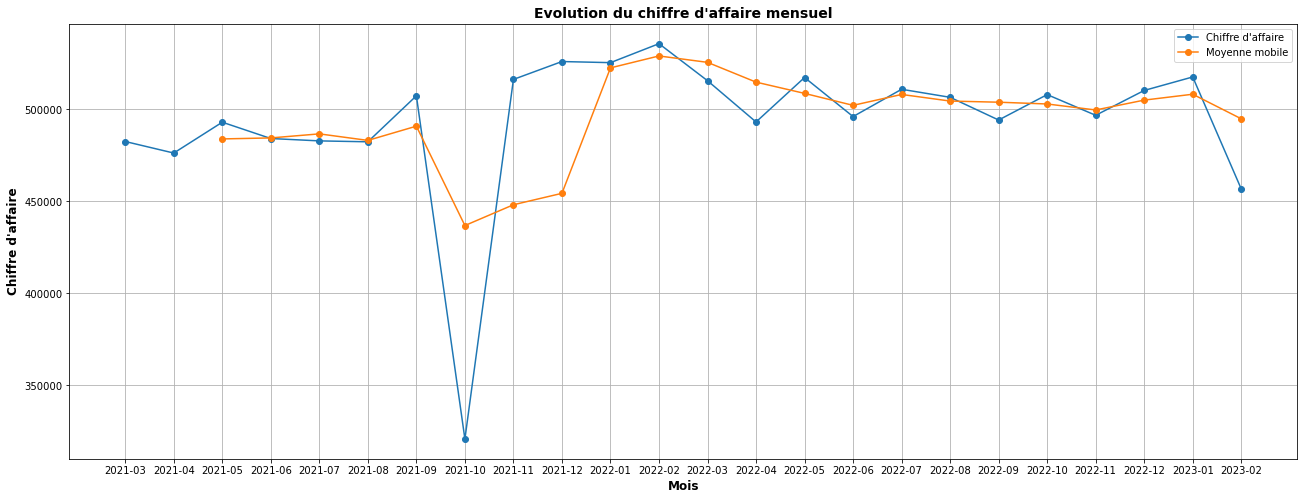

In [76]:
plt.figure(figsize=(22,8))
plt.plot(moyenneMobile, marker='o')
plt.title('Evolution du chiffre d\'affaire mensuel',fontsize=14, fontweight='bold')
plt.xlabel('Mois',fontsize=12, fontweight='bold')
plt.ylabel('Chiffre d\'affaire',fontsize=12, fontweight='bold')
plt.grid (True)
plt.legend(labels=["Chiffre d'affaire","Moyenne mobile"])
plt.show()

Notre analyse est basée sur la moyenne mobile. Le chiffre d'affaire connait une baisse en octobre 2021. Il augmente dès décembre 2021 pour connaitre une baisse progressive dès février 2022. 

### 4.7 - Analyse de l'évolution du chiffre d'affaire annuel<a class="anchor" id="section_4_7"></a>

Les données s'étendent sur 24 mois et chevauchent sur 3 ans. D'une année à une autre, nous n'avons pas le même nombre de mois. De ce fait, nous répartissons les données en 2 groupes de 12 mois pour une analyse objective. 

##### Copie des données

In [77]:
CAAnnuel=CAMensuel.copy()

##### Echantilloner les données

In [78]:
# Données des 12 premiers mois
An1=CAAnnuel[0:12]
An1=An1.reset_index()
An1

,Année_Mois,CA
0,2021-03,482546.18
1,2021-04,476273.52
2,2021-05,493037.31
3,2021-06,484170.67
4,2021-07,482882.32
5,2021-08,482390.36
6,2021-09,507381.44
7,2021-10,320880.85
8,2021-11,516285.03
9,2021-12,525999.39


In [79]:
# Données des 12 derniers mois
An2=CAAnnuel[12:24]
An2=An2.reset_index()
An2

,Année_Mois,CA
0,2022-03,515585.56
1,2022-04,493163.16
2,2022-05,517320.28
3,2022-06,496098.23
4,2022-07,510923.88
5,2022-08,506561.11
6,2022-09,494220.10
7,2022-10,508035.07
8,2022-11,496793.97
9,2022-12,510289.88


##### Calculer le chiffre d'affaire des différents échantillons

In [80]:
# Chiffre d'affaire de l'échantillon 1
An1=round((An1['CA'].sum()),2)
print('Le chiffre d\'affaire réalisé la première année : ' + str(An1))

# Chiffre d'affaire de l'échantillon 2
An2=round(An2['CA'].sum(),2)
print('Le chiffre d\'affaire réalisé la deuxième année : ' + str(An2))


Le chiffre d'affaire réalisé la première année : 5832945.24
Le chiffre d'affaire réalisé la deuxième année : 6023375.77


Le chiffre d'affaire le plus elevé a été réalisé la deuxième année. La différence entre ces deux chiffres d'affaire n'est pas elevée.

### 4.8 - Liste des 10 produits les plus vendus (Chiffre d'affaire le plus elevé) <a class="anchor" id="section_4_8"></a>

In [81]:
CAParProduit.sort_values(by='CA',ascending = False).head(10)

,id_prod,price,categ,QuantiteVendue,CA
3097,2_159,145.99,2,650,94893.50
3071,2_135,68.99,2,1005,69334.95
3046,2_112,67.57,2,968,65407.76
3035,2_102,59.14,2,1027,60736.78
3153,2_209,69.99,2,814,56971.86
2620,1_395,28.99,1,1875,54356.25
2592,1_369,23.99,1,2252,54025.48
3044,2_110,62.25,2,865,53846.25
3202,2_39,57.99,2,915,53060.85
3105,2_166,230.04,2,228,52449.12


Certains produits avec un volume de vente elevé ne réalisent pas toujours le chiffre d'affaire le plus elevé. Par exemple le produit 2_159 a le chiffre d\'affaire (94 893,50) le plus elevé avec seulement 650 ventes alors que le produit 1_369 réalise le plus de ventes (2252) avec un CA de 54 025,48.

### 4.9 - Liste des produits les moins vendus (un produit flop est un invendu ou un produit avec un CA inférieur à 300) <a class="anchor" id="section_4_9"></a>

##### Rechercher et afficher les produits invendus

In [82]:
# Selectionner les identifiants des produits dans les transactions 
listeProduits=CAParProduit['id_prod'].unique()

# Vérifier si tous les produits ont été achetés
produitsInvendus=dataProducts.query("id_prod not in @listeProduits")

# Afficher les invendus
produitsInvendus

,id_prod,price,categ
184,0_1016,35.06,0
279,0_1780,1.67,0
731,T_0,0.00,0
737,0_1062,20.08,0
794,0_1119,2.99,0
811,0_1014,1.15,0
846,1_0,31.82,1
1031,0_1318,20.92,0
1139,0_1800,22.05,0
1347,0_1645,2.99,0


##### Afficher les produits invendus

##### Compter et afficher le nombre de produits invendu

In [83]:
QuantitéInvendus=produitsInvendus['id_prod'].count()
print('Nous avons ' + str(QuantitéInvendus) + ' produits invendus.')

Nous avons 22 produits invendus.


##### Rechercher et afficher les produits avec un CA inférieur à 300

In [84]:
# Rechercher les produits avec un CA < 300
produitsCAMoins300 = CAParProduit[(CAParProduit.CA < 300)] 

# Afficher les produits avec un CA < 300
produitsCAMoins300

,id_prod,price,categ,QuantiteVendue,CA
3,0_100,20.60,0,3,61.80
9,0_1005,20.99,0,5,104.95
10,0_1006,26.64,0,8,213.12
14,0_101,12.99,0,18,233.82
15,0_1010,1.96,0,10,19.60
...,...,...,...,...,...
3189,2_27,73.99,2,4,295.96
3243,2_77,145.99,2,2,291.98
3248,2_81,86.99,2,1,86.99
3259,2_93,78.99,2,2,157.98


1000 produits ont un CA inférieur à 300.

##### Ajouter les colonnes QuantiteVendue et CA au dataframe produitsInvendus

Uniformiser la structure des dataframes des produits flops. La quantité vendue et le CA prennent la valeur nulle. 

In [85]:
produitsInvendus=produitsInvendus.assign(QuantiteVendue=0,CA=0)
produitsInvendus

,id_prod,price,categ,QuantiteVendue,CA
184,0_1016,35.06,0,0,0
279,0_1780,1.67,0,0,0
731,T_0,0.00,0,0,0
737,0_1062,20.08,0,0,0
794,0_1119,2.99,0,0,0
811,0_1014,1.15,0,0,0
846,1_0,31.82,1,0,0
1031,0_1318,20.92,0,0,0
1139,0_1800,22.05,0,0,0
1347,0_1645,2.99,0,0,0


##### Fusionner les invendus les produits avec un CA inférieur à 300

Cela permet d'avoir un seul dataframe avec tous les produits flops

In [86]:
produitsFlops=pd.concat([produitsCAMoins300, produitsInvendus])

##### Remplacer les valeurs nan par 0

In [87]:
produitsFlops=produitsFlops.fillna(0)

##### Afficher les produits flops

In [88]:
produitsFlops.sort_values(by='CA',ascending = False)

,id_prod,price,categ,QuantiteVendue,CA
120,0_1109,29.99,0,10,299.90
1495,0_277,29.99,0,10,299.90
1344,0_2217,24.99,0,12,299.88
2037,0_769,24.99,0,12,299.88
2273,0_981,19.99,0,15,299.85
...,...,...,...,...,...
794,0_1119,2.99,0,0,0.00
737,0_1062,20.08,0,0,0.00
731,T_0,0.00,0,0,0.00
279,0_1780,1.67,0,0,0.00


Nous avons 1022 produits flops.

### 4.10 -  Analyse du profil des clients <a class="anchor" id="section_4_10"></a>

#### 4.10.1 - Tranche d'âge des clients

In [89]:
dataClientsTransactionProduits['Age'].describe()

count    679332.000000
mean         43.188861
std          13.574553
min          17.000000
25%          34.000000
50%          41.000000
75%          51.000000
max          92.000000
Name: Age, dtype: float64

Le plus jeune client a 17 ans et le plus âgé 92 ans.

#### 4.10.2 - Répartition des clients par sexe 

##### Les clients de la base de données

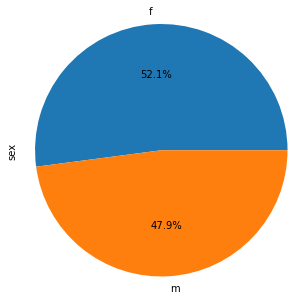

In [90]:
dataCustomers["sex"].value_counts(normalize=True).plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show()

52,1% de nos clients sont des femmes et 47,9% des hommes.

#### 4.10.3 - Répartition des clients par âge 

##### Pour tous les âges

In [91]:
Repartitionclientparage = dataCustomers.groupby(['Age']).agg({'client_id':'count'})
Repartitionclientparage.sort_values(by='client_id',ascending = False)

,client_id
Age,
17,440
42,215
33,207
35,203
43,199
...,...
88,8
89,6
90,4


Les 17 ans concentrent plus de clients que les autres âges, s'en suit les 42 ans. Les 92 ans concentre le moins de clients.

##### Pour les 18, 19 et 20 ans

In [92]:
Repartitionclientparage.query('Age==18 | Age==19 | Age==20')

,client_id
Age,
18,146
19,146
20,129


 L'écart de concentrations entre les 17 ans et la tranche 18,19 et 20 ans est énorme alors que l'écart d'âge est faible. Cela laisse penser que certains 17 ans n'ont pas donné leur âge réel.

#### 4.10.4 - Comportement d'achat par sexe et catégorie de produits

##### Calculer le chiffre d'affaire par ligne de transaction

In [93]:
# Copier les données
CAParTransactionClient=dataClientsTransactionProduits.copy()

# Créer la colonne quantité en lui attibuant la valeur 1 car chaque ligne représente la commande d'un produit
CAParTransactionClient['QuantiteVendue']=1 

# Calculer le CA réalisé par ligne de vente
CAParTransactionClient['CA']=CAParTransactionClient['price']*CAParTransactionClient['QuantiteVendue']

# Afficher les données
CAParTransactionClient

,client_id,sex,birth,Age,id_prod,date,session_id,Année_Mois,Année,price,categ,QuantiteVendue,CA
0,c_4410,f,1967,54,0_1277,2022-03-25,s_184041,2022-03,2022,7.99,0,1,7.99
1,c_4410,f,1967,54,0_1277,2021-09-25,s_94984,2021-09,2021,7.99,0,1,7.99
2,c_4410,f,1967,54,0_1376,2021-09-24,s_94984,2021-09,2021,16.24,0,1,16.24
3,c_4410,f,1967,54,0_1376,2022-04-24,s_198987,2022-04,2022,16.24,0,1,16.24
4,c_4410,f,1967,54,0_1376,2023-01-24,s_331878,2023-01,2023,16.24,0,1,16.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_84,f,1982,39,0_1452,2021-09-20,s_92701,2021-09,2021,13.77,0,1,13.77
679328,c_84,f,1982,39,0_1110,2021-09-20,s_92701,2021-09,2021,4.71,0,1,4.71
679329,c_84,f,1982,39,0_1399,2021-10-01,s_98493,2021-10,2021,17.99,0,1,17.99
679330,c_84,f,1982,39,1_110,2021-09-13,s_89478,2021-09,2021,54.90,1,1,54.90


##### Répartir le chiffre d'affaire par sexe et catégorie

In [94]:
CAParCategorieEtSexe = pd.pivot_table(CAParTransactionClient, values='CA',index=['sex'], columns='categ',aggfunc=np.sum, margins=True, margins_name='CA Total',fill_value = 0)
CAParCategorieEtSexe=round(CAParCategorieEtSexe,2)
CAParCategorieEtSexe

categ,0,1,2,CA Total
sex,,,,
f,2191385.48,2358417.02,1311253.04,5861055.54
m,2230937.82,2295305.67,1469021.98,5995265.47
CA Total,4422323.30,4653722.69,2780275.02,11856321.01


Le comportement d'achat des clients est légèrement différent d'un homme à une femme pour chaque catégorie. Pour la catégorie 0 et 2, les hommes génèrent plus de CA que les femmes. Pour la catégorie 1, ce sont les femmes qui génèrent plus de CA. Les produits de la catégorie 1 génèrent le CA le plus elevé.

##### Représenter le CA par sexe et catégorie de produits

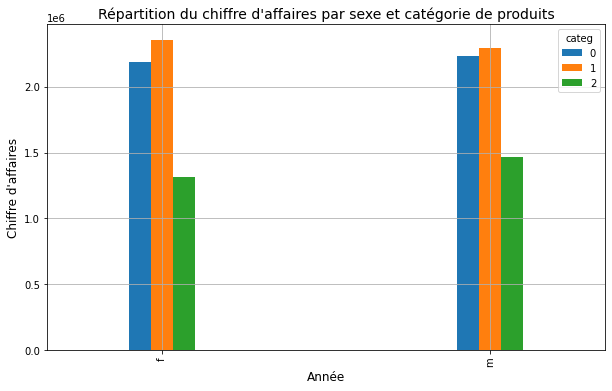

In [95]:
CAParCategorieEtSexeSansTotal = pd.pivot_table(CAParTransactionClient, values='CA',index=['sex'], columns='categ',aggfunc=np.sum, fill_value = 0)
CAParCategorieEtSexeSansTotal=round(CAParCategorieEtSexeSansTotal,2)
CAParCategorieEtSexeSansTotal.plot.bar(width=0.2,figsize=(10,6))
plt.title('Répartition du chiffre d\'affaires par sexe et catégorie de produits', fontsize=14)
plt.xlabel('Année',fontsize=12)
plt.ylabel('Chiffre d\'affaires',fontsize=12)
plt.grid (True)
plt.show()

Les hommes génèrent plus de CA pour les produits de la catégorie 0 et 2. Les femmes génèrent plus de CA pour les produits de la catégorie 1. La différence n'est pas énorme.

#### 4.10.5 - Fréquence d'achat par tranche d'age

#####  Créer des tranches d'âge et les affecter à chaque client

In [96]:
def ageIntervale(age):
    if age>=17 and age<24:
        return '[17-24ans]'
    elif age>=25 and age<35:
        return '[25-34ans]'
    elif age>=35 and age<45:
        return '[35-44ans]'
    elif age>=45 and age<55:
        return '[45-54ans]'
    elif age>=55 and age<65:
        return '[55-64ans]'
    elif age>=65 and age<75:
        return '[65-74ans]'
    elif age>=75 and age<85:
        return '[75-84ans]'
    elif age>=85:
        return '[85-92ans]'
    
CAParTransactionClient['trancheAge']=CAParTransactionClient['Age'].apply(ageIntervale)
CAParTransactionClient

,client_id,sex,birth,Age,id_prod,date,session_id,Année_Mois,Année,price,categ,QuantiteVendue,CA,trancheAge
0,c_4410,f,1967,54,0_1277,2022-03-25,s_184041,2022-03,2022,7.99,0,1,7.99,[45-54ans]
1,c_4410,f,1967,54,0_1277,2021-09-25,s_94984,2021-09,2021,7.99,0,1,7.99,[45-54ans]
2,c_4410,f,1967,54,0_1376,2021-09-24,s_94984,2021-09,2021,16.24,0,1,16.24,[45-54ans]
3,c_4410,f,1967,54,0_1376,2022-04-24,s_198987,2022-04,2022,16.24,0,1,16.24,[45-54ans]
4,c_4410,f,1967,54,0_1376,2023-01-24,s_331878,2023-01,2023,16.24,0,1,16.24,[45-54ans]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_84,f,1982,39,0_1452,2021-09-20,s_92701,2021-09,2021,13.77,0,1,13.77,[35-44ans]
679328,c_84,f,1982,39,0_1110,2021-09-20,s_92701,2021-09,2021,4.71,0,1,4.71,[35-44ans]
679329,c_84,f,1982,39,0_1399,2021-10-01,s_98493,2021-10,2021,17.99,0,1,17.99,[35-44ans]
679330,c_84,f,1982,39,1_110,2021-09-13,s_89478,2021-09,2021,54.90,1,1,54.90,[35-44ans]


##### Calculer le nombre d'achat par client

In [97]:
# Copie des données
nbreAchatParClient = CAParTransactionClient.copy()

# Calculer le nombre d'achat par client
nbreAchatParClient =nbreAchatParClient.groupby(['client_id']).agg({'sex':'first','Age':'first','trancheAge':'first','Année':'first','session_id':'count','CA':'sum'})

# Renommer la colonne session_id en nbreCommande
nbreAchatParClient.rename(columns={'session_id':'nbreCommande'}, inplace=True)

# Supprimer les index
nbreAchatParClient=nbreAchatParClient.reset_index()

# Afficher les données
nbreAchatParClient

,client_id,sex,Age,trancheAge,Année,nbreCommande,CA
0,c_1,m,66,[65-74ans],2022,39,558.18
1,c_10,m,65,[65-74ans],2022,58,1353.60
2,c_100,m,29,[25-34ans],2021,8,254.85
3,c_1000,f,55,[55-64ans],2022,125,2261.89
4,c_1001,m,39,[35-44ans],2022,102,1812.86
...,...,...,...,...,...,...,...
8595,c_995,m,66,[65-74ans],2022,14,189.41
8596,c_996,f,51,[45-54ans],2022,95,1625.58
8597,c_997,f,27,[25-34ans],2021,59,1490.01
8598,c_998,m,20,[17-24ans],2021,53,2779.88


Sur les 8 623 clients de la base de données, 8 600 ont effectué un achat.

##### Calculer le nombre de commande et client par tranche d'âge

In [98]:
# Compter le nombre de commande et client par tranche d'âge
NbreClientParTrancheAge = nbreAchatParClient.groupby(['trancheAge']).agg({'client_id':'count','nbreCommande':'sum'})

# Renommer la colonne client_id en nombre de clients 
NbreClientParTrancheAge.rename(columns={'client_id':'nbreClient'}, inplace=True)

# Supprimer les index
NbreClientParTrancheAge=NbreClientParTrancheAge.reset_index()

# Afficher les données
NbreClientParTrancheAge

,trancheAge,nbreClient,nbreCommande
0,[17-24ans],1284,47855
1,[25-34ans],1656,122929
2,[35-44ans],1772,235916
3,[45-54ans],1562,147512
4,[55-64ans],1109,62902
5,[65-74ans],729,39865
6,[75-84ans],279,14776
7,[85-92ans],58,2819


Les clients de 35-44 ans commandent plus que les autres. Les clients de 85-92 ans commandent moins que les autres.

##### Calculer la fréquence mensuelle d'achat par tranche d'âge

In [99]:
# Copier les données
FreqAchatParClientTrancheAge = NbreClientParTrancheAge.copy()

# Calculer la fréquence d'achat mensuel
FreqAchatParClientTrancheAge ['freqAchatMensuel']=(FreqAchatParClientTrancheAge['nbreCommande']/FreqAchatParClientTrancheAge['nbreClient'])/24

# Afficher les données
FreqAchatParClientTrancheAge=round(FreqAchatParClientTrancheAge,2)
FreqAchatParClientTrancheAge

,trancheAge,nbreClient,nbreCommande,freqAchatMensuel
0,[17-24ans],1284,47855,1.55
1,[25-34ans],1656,122929,3.09
2,[35-44ans],1772,235916,5.55
3,[45-54ans],1562,147512,3.93
4,[55-64ans],1109,62902,2.36
5,[65-74ans],729,39865,2.28
6,[75-84ans],279,14776,2.21
7,[85-92ans],58,2819,2.03


Les clients de 35 à 44 ans sont ceux qui achètent le plus de livres par mois, entre 5 et 6 livres. Les clients de 17 à 24 ans sont ceux qui achètent le moins de livres par mois, en moyenne 1 ou 2 livres.

#### 4.10.6 - Panier moyen par tranche d'age

##### Calculer le nombre de commande et le chiffre d'affaire par tranche d'âge

In [100]:
NbreClientCAParTrancheAge=nbreAchatParClient.copy()

# Compter le nombre de commande et et calculer le CA par tranche d'âge
nbreAchatParClient = nbreAchatParClient.groupby(['trancheAge']).agg({'nbreCommande':'sum','CA':'sum'})

# Renommer la colonne client_id en nombre de clients 
NbreClientParTrancheAge.rename(columns={'client_id':'nbreClient'}, inplace=True)

# Supprimer les index
NbreClientCAParTrancheAge=NbreClientCAParTrancheAge.reset_index()

# Afficher les données
nbreAchatParClient

,nbreCommande,CA
trancheAge,,
[17-24ans],47855,2007994.49
[25-34ans],122929,2370785.18
[35-44ans],235916,3114149.02
[45-54ans],147512,2161967.14
[55-64ans],62902,1056086.92
[65-74ans],39865,666554.56
[75-84ans],14776,248788.49
[85-92ans],2819,47078.45


##### Calculer le panier moyen

In [101]:
PanierMoyenTrancheAge=nbreAchatParClient.copy()

PanierMoyenTrancheAge['PanierMoyen']= round((PanierMoyenTrancheAge['CA']/PanierMoyenTrancheAge['nbreCommande']),2)
PanierMoyenTrancheAge=PanierMoyenTrancheAge.reset_index()
PanierMoyenTrancheAge

,trancheAge,nbreCommande,CA,PanierMoyen
0,[17-24ans],47855,2007994.49,41.96
1,[25-34ans],122929,2370785.18,19.29
2,[35-44ans],235916,3114149.02,13.20
3,[45-54ans],147512,2161967.14,14.66
4,[55-64ans],62902,1056086.92,16.79
5,[65-74ans],39865,666554.56,16.72
6,[75-84ans],14776,248788.49,16.84
7,[85-92ans],2819,47078.45,16.70


Les 17-24 ans ont le panier moyen le plus elevé 41,96 avec une fréquence d'achat mensuelle d'un ou deux livres. Les 35-44 ans ont le panier moyne le plus faible, 13,20.

In [102]:
test=dataProducts.query('categ==2')
test['price'].describe()

count    239.000000
mean     108.354686
std       49.561431
min       30.990000
25%       71.065000
50%      101.990000
75%      136.530000
max      300.000000
Name: price, dtype: float64

#### 4.10.7 - Comportement d'achat par tranche  d'âge et catégorie de produits

##### Calculer le chiffre d\'affaires par tranche d\'âge et catégorie

In [103]:
CAParTransactionClient

,client_id,sex,birth,Age,id_prod,date,session_id,Année_Mois,Année,price,categ,QuantiteVendue,CA,trancheAge
0,c_4410,f,1967,54,0_1277,2022-03-25,s_184041,2022-03,2022,7.99,0,1,7.99,[45-54ans]
1,c_4410,f,1967,54,0_1277,2021-09-25,s_94984,2021-09,2021,7.99,0,1,7.99,[45-54ans]
2,c_4410,f,1967,54,0_1376,2021-09-24,s_94984,2021-09,2021,16.24,0,1,16.24,[45-54ans]
3,c_4410,f,1967,54,0_1376,2022-04-24,s_198987,2022-04,2022,16.24,0,1,16.24,[45-54ans]
4,c_4410,f,1967,54,0_1376,2023-01-24,s_331878,2023-01,2023,16.24,0,1,16.24,[45-54ans]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_84,f,1982,39,0_1452,2021-09-20,s_92701,2021-09,2021,13.77,0,1,13.77,[35-44ans]
679328,c_84,f,1982,39,0_1110,2021-09-20,s_92701,2021-09,2021,4.71,0,1,4.71,[35-44ans]
679329,c_84,f,1982,39,0_1399,2021-10-01,s_98493,2021-10,2021,17.99,0,1,17.99,[35-44ans]
679330,c_84,f,1982,39,1_110,2021-09-13,s_89478,2021-09,2021,54.90,1,1,54.90,[35-44ans]


In [104]:
CAParTrancheageEtCategorie=pd.crosstab(CAParTransactionClient['trancheAge'], CAParTransactionClient['categ'], CAParTransactionClient['CA'],aggfunc="sum", normalize=False)
CAParTrancheageEtCategorie=round(CAParTrancheageEtCategorie,2)
CAParTrancheageEtCategorie

categ,0,1,2
trancheAge,,,
[17-24ans],102391.75,368951.40,1536651.34
[25-34ans],843903.60,663754.82,863126.76
[35-44ans],1912382.70,1128111.61,73654.71
[45-54ans],994024.30,1083230.35,84712.49
[55-64ans],292025.11,715619.95,48441.86
[65-74ans],183145.62,456406.09,27002.85
[75-84ans],67754.11,169708.30,11326.08
[85-92ans],13428.28,31814.86,1835.31


##### Représenter graphiquement du chiffre d\'affaires par tranche d\'âge et catégorie

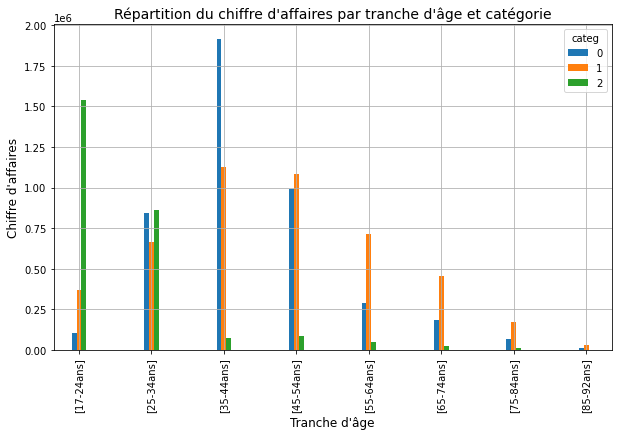

In [105]:
CAParTrancheageEtCategorie.plot.bar(width=0.2,figsize=(10,6))
plt.title('Répartition du chiffre d\'affaires par tranche d\'âge et catégorie', fontsize=14)
plt.xlabel('Tranche d\'âge',fontsize=12)
plt.ylabel('Chiffre d\'affaires',fontsize=12)
plt.grid (True)
plt.show()

Les 35-44 ans consomment plus les produits de la catégorie 0. Les 17-24 ans consomment plus les produits de la catégorie 2. Les 35-44 ans, 45-54 ans consomment plus les produits de la catégorie 1. De 35 ans à 74 ans, les clients consomment très peu les produits de la catégorie 2. Les personnes de plus de 75 ans consomment très peu nos produits toute catégorie confondue.

### 4.11 - Analyse de la répartition du chiffre d'affaire entre les clients <a class="anchor" id="section_4_11"></a>

##### Calculer le CA par client

In [106]:
CAParClient=CAParTransactionClient.groupby(['client_id', 'sex', 'Age' ]).agg({'CA':'sum'})
CAParClient=CAParClient.reset_index()
CAParClient

,client_id,sex,Age,CA
0,c_1,m,66,558.18
1,c_10,m,65,1353.60
2,c_100,m,29,254.85
3,c_1000,f,55,2261.89
4,c_1001,m,39,1812.86
...,...,...,...,...
8595,c_995,m,66,189.41
8596,c_996,f,51,1625.58
8597,c_997,f,27,1490.01
8598,c_998,m,20,2779.88


##### Répartitir le CA entre les clients

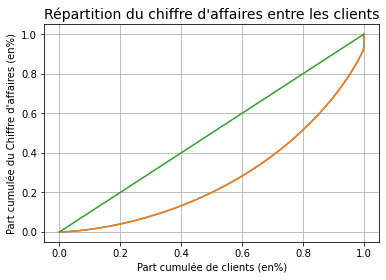

In [107]:
depenses = CAParClient['CA']
n = len(depenses)
lorenz = np.cumsum(np.sort(depenses )) / depenses .sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title('Répartition du chiffre d\'affaires entre les clients', fontsize=14)
plt.xlabel('Part cumulée de clients (en%)',fontsize=10)
plt.ylabel('Part cumulée du Chiffre d\'affaires (en%)',fontsize=10)
plt.grid (True)
plt.show()

A priori sur ce diagramme, 20% de clients génèrent moins de 50% du CA et les 80% autres le reste. La répartition est inégalitaire.

##### Calculer l'indice de Gini

In [108]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.44639658571467167

La valeur de l'indice de gini (0,44 éloigné de 0) confirme l'observation faite sur le graphique. La répartition du Chiffre d'affaire est inégalitaire.

##### Rechercher les gros clients (20% qui génèrent 50% du CA)

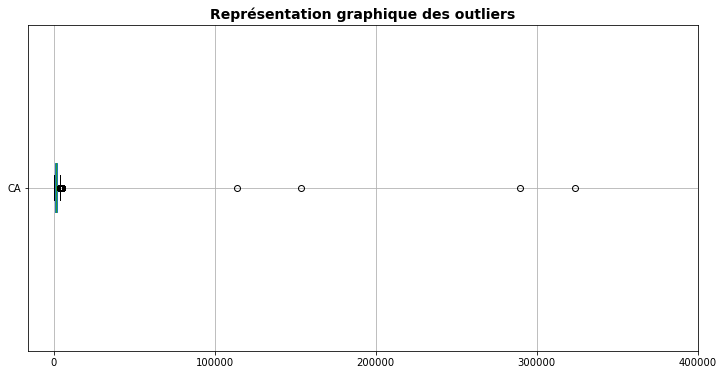

In [109]:
plt.figure(figsize=(12,6))
CAParClient.boxplot(column="CA", vert=False)
plt.xticks([100000*i for i in range(5)])

#Ajouter le titre à la boite à moustache
plt.title('Représentation graphique des outliers', fontsize=14, fontweight='bold')

#Afficher le graphique 
plt.show()

Nous avons 4 gros clients qui se démarquent des autres clients. Vu le volume de leurs achats, nous pensons que ce sont des entreprises.

##### Afficher les 4 plus gros clients

In [110]:
CAParClient.sort_values(by='CA',ascending = False).head(4)

,client_id,sex,Age,CA
677,c_1609,m,41,324033.35
4388,c_4958,m,22,289760.34
6337,c_6714,f,53,153669.30
2724,c_3454,m,52,113673.12


##### Calculer le CA generé par les 4 plus gros clients

In [111]:
# Isoler les 4 gros clients dans un dataframe
GrosClients=['c_1609','c_4958','c_6714','c_3454']
DetailsGrosClients = CAParClient[CAParClient.client_id.isin(GrosClients)]

# Calculer le CA
CAGrosClient= round((DetailsGrosClients['CA'].sum()),2)
CAGrosClient

881136.11

Le CA generé par les 4 gros clients est de 881 136,11.

##### Calculer le pourcentage du CA des gros clients sur le CA global

In [112]:
PourcentageCAGrosClient= round((CAGrosClient/CATotal)*100,2)
PourcentageCAGrosClient

7.43

Le CA des gros clients représente 7,43% du CA global. Il n'est pas négligeable.

### 4.12 - Analyse de la corrélation entre le prix de vente et le nombre de ventes <a class="anchor" id="section_4_12"></a>

##### Représenter graphiquement la corrélation entre le prix de vente et le nombre de vente

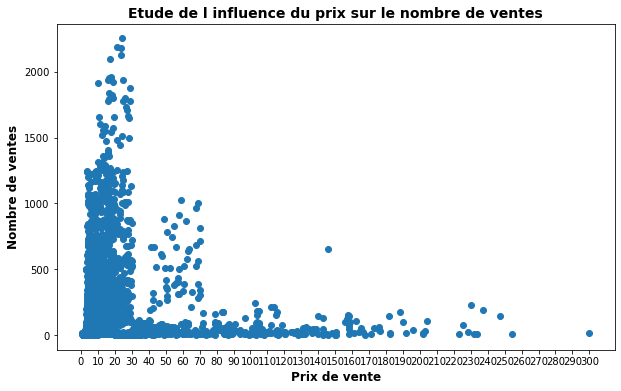

In [113]:
plt.figure(figsize=(10,6))
plt.scatter(CAParProduit['price'],CAParProduit['QuantiteVendue'])
plt.xticks([10*i for i in range(31)])
plt.xlabel('Prix de vente', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de ventes', fontsize=12, fontweight='bold')
plt.title('Etude de l influence du prix sur le nombre de ventes', fontsize=14, fontweight='bold')
plt.show()

A priori sur ce diagramme de dispersion, le nombre de vente diminue au fur et à mesure que les prix augmentent.

##### Calculer et afficher le coefficient de corrélation de Pearson

In [114]:
st.pearsonr(CAParProduit['price'],CAParProduit['QuantiteVendue'])[0]

-0.09137924872014026

D'après le coefficient de pearson,la corrélation entre le prix de vente et le nombre de ventes est faible. Nous pensons donc que l'observation graphique est le fait du hasard. Il n'y a pas de lien entre la quantité vendue et le prix de vente.

### 4.13 - Analyse de la corrélation entre le genre d’un client et les catégories des livres achetés (test d'indépendance) <a class="anchor" id="section_4_13"></a>

Pour cette analyse, nous supprimons les 4 gros clients car les entreprises n'ont pas de sexe.

##### Afficher les transactions des 4 gros clients

In [115]:
CAParTransactionClient.query('client_id=="c_1609" | client_id=="c_4958" | client_id=="c_6714" | client_id=="c_3454"')

,client_id,sex,birth,Age,id_prod,date,session_id,Année_Mois,Année,price,categ,QuantiteVendue,CA,trancheAge
101814,c_4958,m,1999,22,1_251,2021-08-21,s_78847,2021-08,2021,15.99,1,1,15.99,[17-24ans]
101815,c_4958,m,1999,22,1_251,2021-03-31,s_13842,2021-03,2021,15.99,1,1,15.99,[17-24ans]
101816,c_4958,m,1999,22,1_251,2022-12-11,s_310429,2022-12,2022,15.99,1,1,15.99,[17-24ans]
101817,c_4958,m,1999,22,1_251,2021-07-11,s_60832,2021-07,2021,15.99,1,1,15.99,[17-24ans]
101818,c_4958,m,1999,22,1_251,2022-04-21,s_197410,2022-04,2022,15.99,1,1,15.99,[17-24ans]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640702,c_3454,m,1969,52,0_978,2021-08-04,s_71163,2021-08,2021,19.11,0,1,19.11,[45-54ans]
640703,c_3454,m,1969,52,0_978,2022-11-04,s_292466,2022-11,2022,19.11,0,1,19.11,[45-54ans]
640704,c_3454,m,1969,52,1_226,2021-06-30,s_56116,2021-06,2021,37.73,1,1,37.73,[45-54ans]
640705,c_3454,m,1969,52,1_440,2022-02-23,s_169825,2022-02,2022,7.32,1,1,7.32,[45-54ans]


##### Supprimer les transactions des 4 plus gros clients

In [116]:
indexNames = CAParTransactionClient[(CAParTransactionClient['client_id'] =='c_1609') | (CAParTransactionClient['client_id'] =='c_4958') | (CAParTransactionClient['client_id']=='c_6714') | (CAParTransactionClient['client_id']=='c_3454')].index
CAParTransactionClient.drop(indexNames , inplace=True)

##### Afficher la nouvelle dimension du dataframe CAParTransactionClient

In [117]:
CAParTransactionClient.shape

(632689, 14)

Sur les 679 332 transactions, les transactions des gros clients 46 643 ont été supprimés. Il en reste 632 689.

##### Créer le tableau de contingence

In [118]:
X = "sex"  # qualitative
Y = "categ"  # qualitative

cont = CAParTransactionClient[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


##### Créer le graphique de contingence

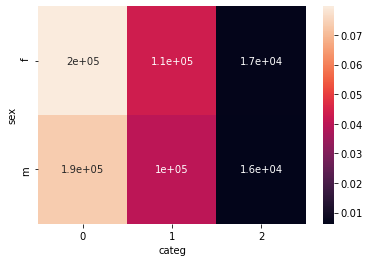

In [119]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(cont)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Pour chaque catégorie de produits, les femmes concentrent plus que les hommes. La différence n'est pas énorme.

##### Poser les hypothèses

In [120]:
print('alpha = 0.05 \n\n H0 :le genre n\'influence pas le choix de la catégorie\n\n H1 : le genre influence le choix de la catégorie de produits')

alpha = 0.05 

 H0 :le genre n'influence pas le choix de la catégorie

 H1 : le genre influence le choix de la catégorie de produits


#### Calculer et afficher le khi2, le degré de liberté et la P_Value via scipy.stats.chi2_contingency

In [121]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

P_Value= st_p
Chi2=st_chi2
DegréDeLiberte=st_dof
print('Chi2 = ',Chi2)
print('Degré de liberté = ',DegréDeLiberte)
print('P_Value = ',P_Value)

Chi2 =  20.200173796862927
Degré de liberté =  6
P_Value =  0.002551063708568263


##### Analyser le résultat

In [122]:
alpha = 0.05
if P_Value<alpha:
    print('Au regard du test de  khi2, nous rejetons l\'hypothèse nulle. Le genre influence le choix de la catégorie.')
else :
    print('Au regard du test de  khi2,le genre n\'influence pas le choix de la catégorie de produits.')

Au regard du test de  khi2, nous rejetons l'hypothèse nulle. Le genre influence le choix de la catégorie.


### 4.14 - Analyse de la corrélation entre l’âge des clients et le montant total des achats <a class="anchor" id="section_4_14"></a>

In [123]:
CAParTransactionClient

,client_id,sex,birth,Age,id_prod,date,session_id,Année_Mois,Année,price,categ,QuantiteVendue,CA,trancheAge
0,c_4410,f,1967,54,0_1277,2022-03-25,s_184041,2022-03,2022,7.99,0,1,7.99,[45-54ans]
1,c_4410,f,1967,54,0_1277,2021-09-25,s_94984,2021-09,2021,7.99,0,1,7.99,[45-54ans]
2,c_4410,f,1967,54,0_1376,2021-09-24,s_94984,2021-09,2021,16.24,0,1,16.24,[45-54ans]
3,c_4410,f,1967,54,0_1376,2022-04-24,s_198987,2022-04,2022,16.24,0,1,16.24,[45-54ans]
4,c_4410,f,1967,54,0_1376,2023-01-24,s_331878,2023-01,2023,16.24,0,1,16.24,[45-54ans]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_84,f,1982,39,0_1452,2021-09-20,s_92701,2021-09,2021,13.77,0,1,13.77,[35-44ans]
679328,c_84,f,1982,39,0_1110,2021-09-20,s_92701,2021-09,2021,4.71,0,1,4.71,[35-44ans]
679329,c_84,f,1982,39,0_1399,2021-10-01,s_98493,2021-10,2021,17.99,0,1,17.99,[35-44ans]
679330,c_84,f,1982,39,1_110,2021-09-13,s_89478,2021-09,2021,54.90,1,1,54.90,[35-44ans]


In [124]:
# copier les données 
cltTrancheAgeCATotal=CAParTransactionClient.copy()

# Calculer le CA par tranche d'âge
cltTrancheAgeCATotal = cltTrancheAgeCATotal.groupby('trancheAge').agg({'CA':'sum'})

# Supprimer l'index
cltTrancheAgeCATotal = cltTrancheAgeCATotal.reset_index()

# Afficher les données
cltTrancheAgeCATotal

,trancheAge,CA
0,[17-24ans],1.718234e+06
1,[25-34ans],2.370785e+06
2,[35-44ans],2.790116e+06
3,[45-54ans],1.894625e+06
4,[55-64ans],1.056087e+06
5,[65-74ans],6.665546e+05
6,[75-84ans],2.487885e+05
7,[85-92ans],4.707845e+04


##### Représenter graphiquement la relation entre le montant total des achats et l'âge

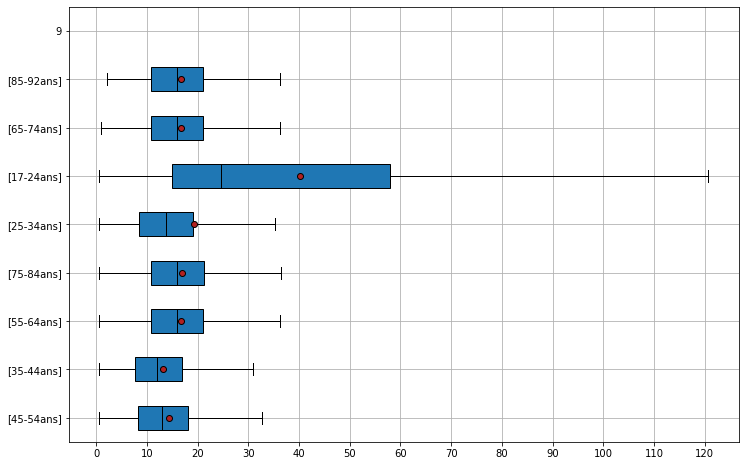

In [125]:
X = "trancheAge" # qualitative
Y = "CA" # quantitative

modalites = CAParTransactionClient[X].unique()
groupes = []
for m in modalites:
    groupes.append(CAParTransactionClient[CAParTransactionClient[X]==m][Y])

plt.figure(figsize=(12,8))
plt.xticks([10*i for i in range(100)])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
           'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid (True)

plt.show()

Le montant total des achats varie d'une tranche d'âge à une autre. Les 17-24 ans ont le montant total des achats le plus elevé et plus dispersé que ceux des 45-54 ans.

##### Calcul de l'indicateur état carré 

In [126]:
X = "Age" # qualitative
Y = "CA" # quantitative

#sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
etaCarre = eta_squared(CAParTransactionClient[X],CAParTransactionClient[Y])

print('L\'état carré = ', etaCarre)

L'état carré =  0.22202818469975458


Il y a une faible corrélation entre l'âge et le montant total des achats.

### 4.15 - Analyse de la corrélation entre l’âge des clients et la fréquence d’achat <a class="anchor" id="section_4_15"></a>

##### Représenter graphiquement l’âge des clients et la fréquence d’achat

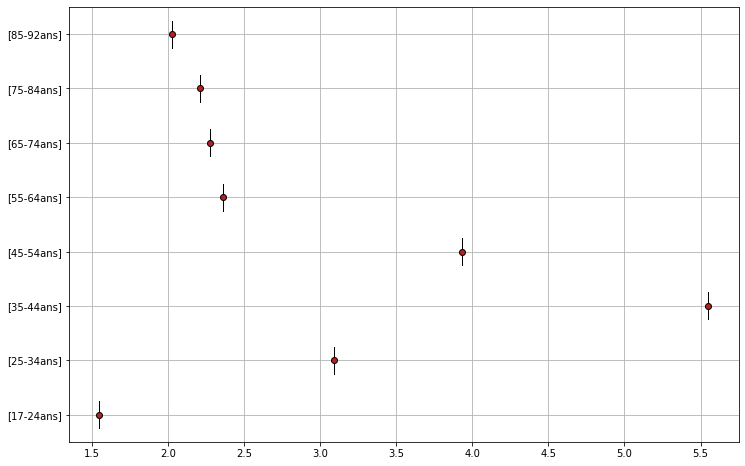

In [127]:
X = "trancheAge" # qualitative
Y = "freqAchatMensuel" # quantitative

modalites = FreqAchatParClientTrancheAge[X].unique()
groupes = []
for m in modalites:
    groupes.append(FreqAchatParClientTrancheAge[FreqAchatParClientTrancheAge[X]==m][Y])

plt.figure(figsize=(12,8))
#CAParClient.boxplot(column="CA", vert=False)
#plt.xticks([10*i for i in range(5)])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
           'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid (True)
#plt.boxplot(groupes, labels=modalites, showfliers=False, 
            #vert=False, patch_artist=True, showmeans=True)
plt.show()

La moyenne de la fréquence d'achat diffère d'une tranche d'âge à une autre.

##### Calculer l'état carré

In [128]:
X = "trancheAge" # qualitative
Y = "freqAchatMensuel" # quantitative

#sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
etaCarre = eta_squared(FreqAchatParClientTrancheAge[X],FreqAchatParClientTrancheAge[Y])

print('L\'état carré = ', etaCarre)

L'état carré =  1.0


Il y a une forte corrélation entre l'âge et la fréquence d'achat.

### 4.16 - Analyse de la corrélation entre l’âge des clients et la taille du panier moyen <a class="anchor" id="section_4_16"></a>

##### Calculer la taille du panier moyen par age

In [129]:
# Copier les données
taillePanierMoyen=CAParTransactionClient.copy()

# Calculer la taille du panier moyen par achat
taillePanierMoyen = taillePanierMoyen.groupby(['session_id']).agg({'trancheAge':'first','id_prod':'count'}).reset_index()

# Renommer la colonne id_prod en taillePanierMoyen
taillePanierMoyen.rename(columns={'id_prod':'taillePanierMoyen'}, inplace=True)

# Copier les données
taillePanierMoyenTrancheAge=taillePanierMoyen.copy()

# Calculer la taille du panier moyen par tranche d'âge
taillePanierMoyenTrancheAge = taillePanierMoyenTrancheAge.groupby('trancheAge').agg({'taillePanierMoyen':'mean'}).reset_index()

# Arrondir les données
round(taillePanierMoyenTrancheAge,2)
#taillePanierMoyenTrancheAge

,trancheAge,taillePanierMoyen
0,[17-24ans],1.76
1,[25-34ans],2.22
2,[35-44ans],2.40
3,[45-54ans],1.97
4,[55-64ans],1.45
5,[65-74ans],1.45
6,[75-84ans],1.48
7,[85-92ans],1.45


Les 35-44 ans ont la taille du panier moyen la plus elevée, 2 à 3. Les tranches 55-64ans, 65-74ans et 85-92ans ont la taille du panier moyen la plus faible, 1 à 2.

##### Représenter graphiquement le lien entre l’âge des clients et la taille du panier moyen

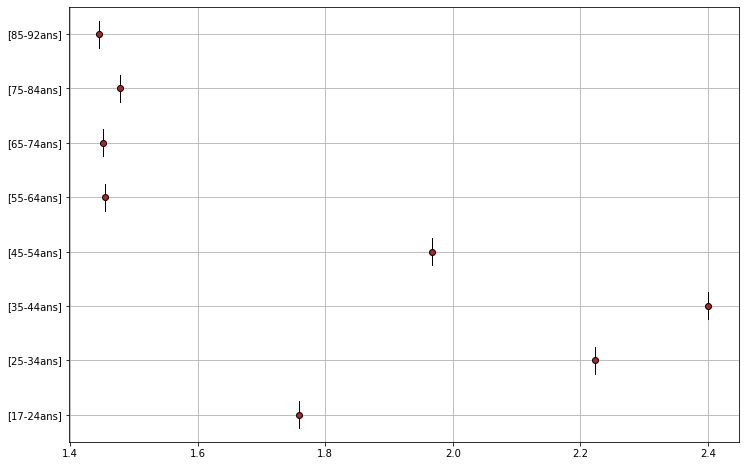

In [130]:
X = "trancheAge" # qualitative
Y = "taillePanierMoyen" # quantitative

modalites = taillePanierMoyenTrancheAge[X].unique()
groupes = []
for m in modalites:
    groupes.append(taillePanierMoyenTrancheAge[taillePanierMoyenTrancheAge[X]==m][Y])

plt.figure(figsize=(12,8))
#plt.xticks([10*i for i in range(6)])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
           'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid (True)

plt.show()

La moyenne de la taille du panier moyen diffère d'une tranche d'âge à une autre à l'exception de des 55-64 ans et 65-74 ans qui ont la même moyenne.

##### Calculer l'état carré

In [131]:
X = "trancheAge" # qualitative
Y = "taillePanierMoyen" # quantitative
#sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
etaCarre = eta_squared(taillePanierMoyenTrancheAge[X],taillePanierMoyenTrancheAge[Y])

print('L\'état carré = ', etaCarre)

L'état carré =  1.0


Il y a une corrélation forte entre l'âge et la taile du panier.

### 4.17 - Analyse de la corrélation entre l’âge (tranche d'âge) des clients et les catégories des livres achetés <a class="anchor" id="section_4_17"></a>

##### Regrouper les données par âge et catégorie

In [132]:
X = "trancheAge"
Y = "categ"

cont1 = CAParTransactionClient[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont1

categ,0,1,2,Total
trancheAge,,,,
[17-24ans],9599,16028,17033,42660
[25-34ans],79117,32329,11483,122929
[35-44ans],159719,49939,770,210428
[45-54ans],85566,45252,734,131552
[55-64ans],27430,34901,571,62902
[65-74ans],17221,22307,337,39865
[75-84ans],6329,8286,161,14776
[85-92ans],1261,1535,23,2819
Total,386242,210577,31112,627931


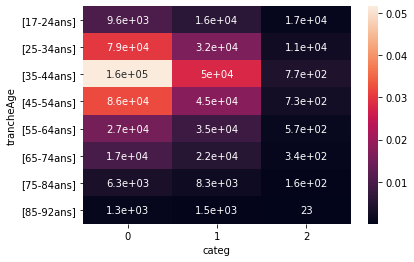

In [133]:
tx = cont1.loc[:,["Total"]]
ty = cont1.loc[["Total"],:]
n = len(cont1)
indep = tx.dot(ty) / n

c = cont1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

La catégorie 0 concentre plus de clients que les autres catégories. Les 35-44 ans concentrent le plus grand nombre de clients toute catégorie confondue. Les 85-92ans concentrent le moins de clients pour toutes les catégories de produit. A la lecture de ce tableau, il y a un lien entre l age et les catégories de livre achetés.

##### Poser les hypothèses

In [134]:
print('alpha = 0.05 \n\n H0 :la tranche d\'âge ne détermine pas le choix de la catégorie\n\n H1 : la tranche d\'âge détermine le choix de la catégorie')

alpha = 0.05 

 H0 :la tranche d'âge ne détermine pas le choix de la catégorie

 H1 : la tranche d'âge détermine le choix de la catégorie


In [135]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont1)

P_Value= st_p
Chi2=st_chi2
DegréDeLiberte=st_dof
print('Chi2 = ',Chi2)
print('Degré de liberté = ',DegréDeLiberte)
print('P_Value = ',P_Value)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont1)

Chi2 =  178430.65107475145
Degré de liberté =  24
P_Value =  0.0


##### Analyser le résultat

In [136]:
alpha = 0.05
if P_Value<alpha:
    print('Au regard du test de  khi2, nous rejetons l\'hypothèse nulle. L\'âge influence le choix de la catégorie de produits.')
else :
    print('Au regard du test de  khi2,l\'âge n\'influence pas le choix de la catégorie de produits.')

Au regard du test de  khi2, nous rejetons l'hypothèse nulle. L'âge influence le choix de la catégorie de produits.


### 4.18 - Probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 <a class="anchor" id="section_4_18"></a>

##### Nombre de clients ayant effectué un achat

In [137]:
NbreClientAvecAchat=dataClientsTransactionProduits['client_id'].drop_duplicates().count()

print('Sur 8623 clients, '+ str(NbreClientAvecAchat) + ' ont effectué un achat.')

Sur 8623 clients, 8600 ont effectué un achat.


##### Probalité qu'un client achète le produit 0_525

In [138]:
# Filtrer les clients ayant acheté le produit 0_525
CltAyantAchete0_525=dataTransactions.query('id_prod=="0_525"')

#Compter le nombre de clients ayant acheté le produit 0_525
nbreClientAyantAchete0_525 = CltAyantAchete0_525['client_id'].count()
print('Le nombre de clients ayant acheté le produit 0_525 est :',nbreClientAyantAchete0_525)

#Calculer la probalité qu'un client achète le produit 0_525
probaAchat0_525= nbreClientAyantAchete0_525/NbreClientAvecAchat
print('La probalité qu\'un client achète le produit 0_525 est :',probaAchat0_525)

Le nombre de clients ayant acheté le produit 0_525 est : 500
La probalité qu'un client achète le produit 0_525 est : 0.05813953488372093


##### Probalité qu'un client achète le produit 2_159

In [139]:
# Filtrer les clients ayant acheté le produit 2_159
CltAyantAchete2_159=dataTransactions.query('id_prod=="2_159"')

#Compter le nombre de clients ayant acheté le produit 2_159
nbreClientAyantAchete2_159 = CltAyantAchete2_159['client_id'].count()
print('Le nombre de clients ayant acheté le produit 2_159 est :' ,nbreClientAyantAchete2_159)

#Calculer la probalité qu'un client achète le produit 2_159
probaAchat2_159= nbreClientAyantAchete2_159/NbreClientAvecAchat
print('La probalité qu\'un client achète le produit 0_525 est :',probaAchat2_159)

Le nombre de clients ayant acheté le produit 2_159 est : 650
La probalité qu'un client achète le produit 0_525 est : 0.0755813953488372


##### Calculer la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159

In [140]:
probabilité = round((probaAchat0_525/probaAchat2_159),2)

print('La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est de '+str(probabilité))

La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est de 0.77


##### Nombre de clients ayant acheté les produits 0_525 et 2_159

In [141]:
CltAyantAchete0_525et2_159 = pd.merge(CltAyantAchete0_525,CltAyantAchete2_159,on=['client_id','client_id'])
NbreClt0_525et2_159 = CltAyantAchete0_525et2_159['client_id'].count()

print('Les clients ayant achetés à la fois les produits 0_525 et 2_159 sont au nombre de ' + str(NbreClt0_525et2_159))

Les clients ayant achetés à la fois les produits 0_525 et 2_159 sont au nombre de 718


## 5 - Préconisations <a class="anchor" id="chapter5"></a>

Il serait interessant d'attribuer un genre propre à l'organisation afin de la distinguer des personnes physiques. Il serait aussi interessant de mettre en place des actions pour mieux connaitre les besoins des 23 clients non acheteurs, afin de leur proposer des offres adaptées. 